# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

In [1]:
import pandas as pd

data_frame = pd.read_csv("automobile_price_data3.csv")

In [2]:
print(data_frame.keys())

print()
data_frame.head(n=10)
# data_frame.tail(n=5)
data_frame.info()
data_frame.tail(n=5)

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel               205 non-null    object 
 3   doors              203 non-null    object 
 4   body               205 non-null    object 
 5   drive              205 non-null    object 
 6   weight             205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bhp                203 non-null    float64
 9   mpg                205 non-null    int64  
 10  price              201 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 17.7+ KB


,normalized-losses,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
200,95.0,volvo,unleaded,four,saloon,rwd,2952,141,114.0,28,16845.0
201,95.0,volvo,unleaded,four,saloon,rwd,3049,141,160.0,25,19045.0
202,95.0,volvo,unleaded,four,saloon,rwd,3012,173,134.0,23,21485.0
203,95.0,volvo,diesel,four,saloon,rwd,3217,145,106.0,27,22470.0
204,95.0,volvo,unleaded,four,saloon,rwd,3062,141,114.0,25,22625.0


array([[<Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bhp'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

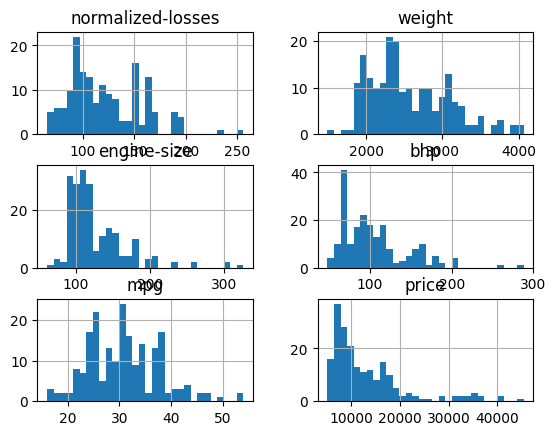

In [3]:
data_frame.hist(bins=30)

### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [4]:
data_frame.dropna(axis="index", how="any", inplace=True)

### Create and train a model
We need to split the data into a training set and a test set

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

130 33


In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = train_set[["weight", "engine-size", "bhp", "mpg"]]
y = train_set["price"]

In [1]:
reg.fit(X, y)

NameError: name 'reg' is not defined

### Determine the performance of the model

In [8]:
print("The bias is ", reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X, y))

# Check the performance on the test set
X_test = test_set[["weight", "engine-size", "bhp", "mpg"]]
y_test = test_set["price"]
print("The score for the test set is", reg.score(X_test, y_test))

The bias is  -13745.371534240066
The feature coefficients are  [  8.77306171  22.58683303  20.0865458  -25.70860656]
The score for the training set is 0.8074993708918531
The score for the test set is 0.6596314663223601
